In [61]:
# Librerías
import pandas as pdv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [62]:
# Carga de datos
crimes=pd.read_csv('./crimes_dataset.csv',sep=';')
crimes.head(5)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,REPORTING_AREA,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,Location
0,I182070304,1107,Fraud,905,01/11/2017 0:00,2017,11,Wednesday,0,Part Two,"(42.33926764, -71.07208833)"
1,I182070115,3114,Investigate Property,793,11/10/2017 17:43,2017,10,Wednesday,17,Part Three,"(42.34650102, -71.13612792)"
2,I182069920,3201,Property Lost,287,31/08/2017 12:08,2017,8,Thursday,12,Part Three,"(42.33192532, -71.08411222)"
3,I182069657,1102,Fraud,774,27/06/2017 7:00,2017,6,Tuesday,7,Part Two,"(42.33848236, -71.15288978)"
4,I182069334,3201,Property Lost,420,08/12/2017 22:00,2017,12,Friday,22,Part Three,"(42.27959103, -71.08132258)"


In [63]:
# Análisis descriptivo

# Número de observaciones
sum(Counter(crimes.OFFENSE_CODE_GROUP).values())

200000

In [64]:
# Tipos de variables
print(crimes.dtypes)

INCIDENT_NUMBER       object
OFFENSE_CODE           int64
OFFENSE_CODE_GROUP    object
REPORTING_AREA        object
OCCURRED_ON_DATE      object
YEAR                   int64
MONTH                  int64
DAY_OF_WEEK           object
HOUR                   int64
UCR_PART              object
Location              object
dtype: object


In [65]:
# Análisis descriptivo de las variables continuas
crimes[['YEAR', 'MONTH', 'HOUR']].describe()

,YEAR,MONTH,HOUR
count,200000.000000,200000.000000,200000.000000
mean,2016.504430,6.557570,13.151550
std,0.499982,3.375336,6.283656
min,2016.000000,1.000000,0.000000
25%,2016.000000,4.000000,9.000000
50%,2017.000000,7.000000,14.000000
75%,2017.000000,9.000000,18.000000
max,2017.000000,12.000000,23.000000


In [66]:
# Volumetría de las variables categóricas
for i in ['OFFENSE_CODE_GROUP', 'REPORTING_AREA', 'OCCURRED_ON_DATE','DAY_OF_WEEK','UCR_PART']:
    print(crimes[i].value_counts())

Motor Vehicle Accident Response              23583
Larceny                                      15709
Medical Assistance                           14795
Investigate Person                           12421
Other                                        10861
                                             ...  
Gambling                                         6
INVESTIGATE PERSON                               3
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE        2
Biological Threat                                2
Burglary - No Property Taken                     1
Name: OFFENSE_CODE_GROUP, Length: 67, dtype: int64
       13942
111     1367
117     1187
186     1177
329     1144
       ...  
669        5
386        5
190        4
745        2
665        2
Name: REPORTING_AREA, Length: 878, dtype: int64
01/06/2017 0:00     29
01/08/2016 0:00     27
01/08/2017 0:00     22
01/01/2017 0:00     21
01/05/2017 0:00     20
                    ..
27/04/2017 9:49      1
25/10/2017 20:28     1
07/11/2017 8:

In [ ]:
# Gráfico de las variables continuas


In [67]:
# Número de categorías en cada variable categórica
for i in ['OFFENSE_CODE','OFFENSE_CODE_GROUP', 'REPORTING_AREA', 'OCCURRED_ON_DATE','DAY_OF_WEEK','UCR_PART']:
    print(i,len(set(crimes[i])))

OFFENSE_CODE 207
OFFENSE_CODE_GROUP 67
REPORTING_AREA 878
OCCURRED_ON_DATE 146598
DAY_OF_WEEK 7
UCR_PART 5


In [68]:
# Volumen de observaciones en cada categoría de OFFENSE_CODE_GROUP
crimes['OFFENSE_CODE_GROUP'].value_counts()

Motor Vehicle Accident Response              23583
Larceny                                      15709
Medical Assistance                           14795
Investigate Person                           12421
Other                                        10861
                                             ...  
Gambling                                         6
INVESTIGATE PERSON                               3
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE        2
Biological Threat                                2
Burglary - No Property Taken                     1
Name: OFFENSE_CODE_GROUP, Length: 67, dtype: int64

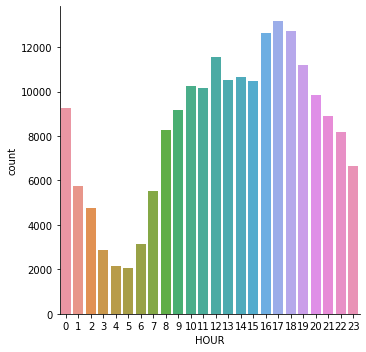

In [69]:
# Distribución de delitos a lo largo del día
sns.catplot(x="HOUR", kind="count", data=crimes)

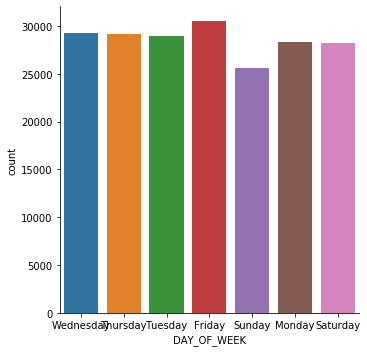

In [70]:
# Distribución de delitos a lo largo de la semana
sns.catplot(x="DAY_OF_WEEK", kind="count", data=crimes)

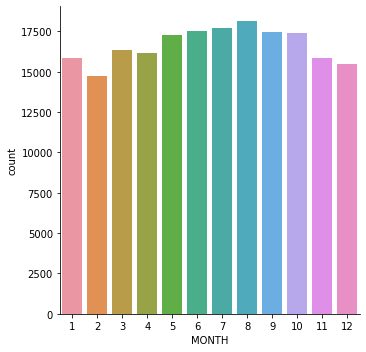

In [71]:
# Distribución de delitos a lo largo del año
sns.catplot(x="MONTH", kind="count", data=crimes)

In [73]:
s=pd.Series(crimes.OFFENSE_CODE_GROUP)
s.describe()

count                              200000
unique                                 67
top       Motor Vehicle Accident Response
freq                                23583
Name: OFFENSE_CODE_GROUP, dtype: object

In [78]:
crimes.groupby(['OFFENSE_CODE_GROUP']).size()

OFFENSE_CODE_GROUP
Aggravated Assault                  4769
Aircraft                              26
Arson                                 66
Assembly or Gathering Violations     576
Auto Theft                          2930
                                    ... 
Towed                               7174
Vandalism                           9900
Verbal Disputes                     8535
Violations                          3537
Warrant Arrests                     5935
Length: 67, dtype: int64

In [81]:
# SUCIO

# Número de categorías
crimes['OFFENSE_CODE_GROUP'].value_counts().count()

# Distintas categorías
crimes['OFFENSE_CODE_GROUP'].unique()

from collections import Counter
Counter(crimes.OFFENSE_CODE_GROUP).keys()

OFFENSE = Counter(crimes.OFFENSE_CODE_GROUP).keys()
sorted(OFFENSE)

# Distintos valores de cada categoría
Counter(crimes.OFFENSE_CODE_GROUP).values()

dict_values([3547, 7326, 5974, 10861, 1968, 15709, 2930, 3309, 3537, 2840, 951, 6707, 1287, 12421, 897, 192, 23583, 9636, 5935, 49, 9900, 2457, 343, 4769, 2403, 2882, 1054, 581, 3193, 572, 1677, 683, 14795, 1086, 7174, 170, 8535, 636, 1202, 642, 244, 355, 325, 10043, 268, 1040, 863, 640, 2, 154, 400, 149, 101, 576, 8, 66, 63, 157, 61, 13, 26, 6, 3, 14, 7, 2, 1])

In [ ]:
# Recategorizar categorías


In [83]:
# Argupación de variables
# Buscar estacionalidad
crimes_group_one = crimes[['OFFENSE_CODE_GROUP','MONTH']]
crimes_group_one.head(10)

,OFFENSE_CODE_GROUP,MONTH
0,Fraud,11
1,Investigate Property,10
2,Property Lost,8
3,Fraud,6
4,Property Lost,12
5,Fraud,1
6,Property Lost,1
7,Investigate Property,11
8,Other,9
9,Confidence Games,10


In [84]:
crimes_group_one = crimes_group_one.groupby(['OFFENSE_CODE_GROUP'],as_index=False).mean()
crimes_group_one

,OFFENSE_CODE_GROUP,MONTH
0,Aggravated Assault,6.605158
1,Aircraft,5.884615
2,Arson,6.651515
3,Assembly or Gathering Violations,6.500000
4,Auto Theft,6.684300
...,...,...
62,Towed,6.686646
63,Vandalism,6.427071
64,Verbal Disputes,6.518219
65,Violations,6.292338


In [ ]:
# Representación de coordenadas